In [1]:
print("Hello World!")

Hello World!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("..\\data\\sample\\newsdata_BRICS_en_21_10_2024_to_27_10_2024.csv")
df2 = pd.read_csv("..\\data\\sample\\newscatcher_BRICS_en_21_10_2024_to_23_10_2024_page001_of_60.csv")

In [5]:
df.head()

,TITLE,ARTICLE LINK,PUBLISHED DATE (GMT),AUTHOR,PUBLISHER,COUNTRY,CATEGORY,LANGUAGE,DESCRIPTION,IMAGE URL,VIDEO URL
0,"""Maris makes Thai Brics debut""",https://www.bangkokpost.com/business/general/2...,2024-10-26 23:21:00,NaN,Bangkok Post,Thailand,Business,English,Foreign Affairs Minister Maris Sangiampongsa s...,https://static.bangkokpost.com/media/content/2...,NaN
1,"""My meeting with South Africa’s Trump, who’s t...",https://www.thetimes.com/comment/columnists/ar...,2024-10-26 23:01:00,NaN,The Times,United Kingdom,Other,English,NaN,https://www.thetimes.com/imageserver/image/%2F...,NaN
2,"""North Korea’s arrival is no triumph for Putin...",https://www.thetimes.com/world/europe/article/...,2024-10-26 23:01:00,NaN,The Times,United Kingdom,Other,English,NaN,https://www.thetimes.com/imageserver/image/%2F...,NaN
3,"""Nicaragua and Venezuela Left Out of BRICS Cou...",https://confidencial.digital/english/nicaragua...,2024-10-26 23:00:45,Redacción Confidencial,Confidencial,Nicaragua,Top,English,Nicaragua and Venezuela were not included in t...,NaN,NaN
4,"""Putin Exaggerates Ukrainian Losses In Kursk R...",https://menafn.com/1108821069/Putin-Exaggerate...,2024-10-26 21:10:16,marketing@menafn.com (MENAFN),Menafn,World,Top,English,(MENAFN - UkrinForm) Kremlin leader Vladimir P...,https://menafn.com/updates/pr/2024-10/26/U_58f...,NaN


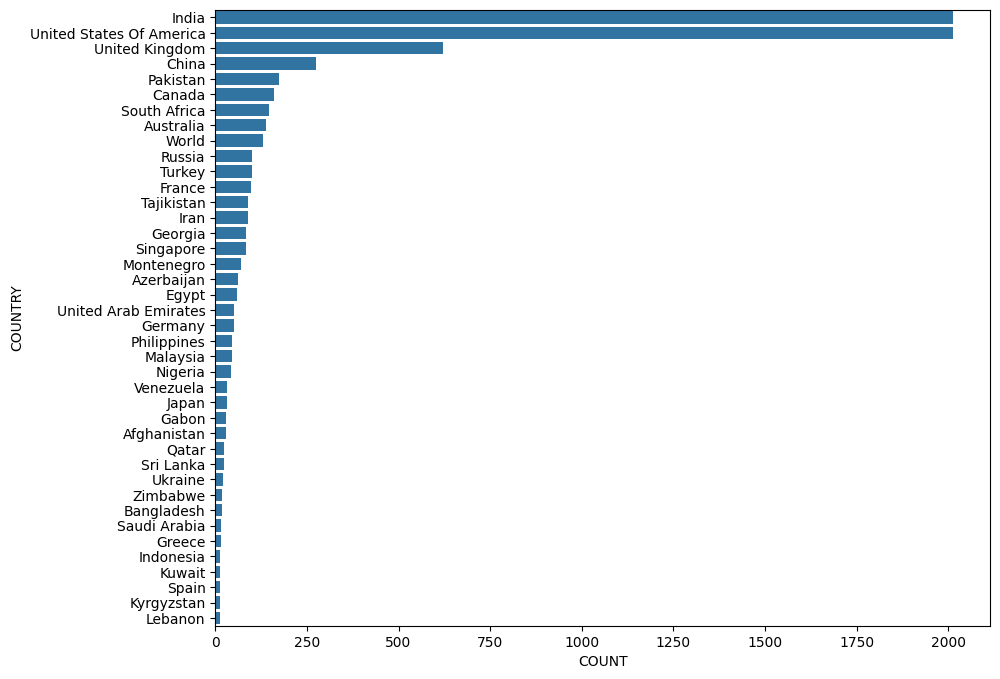

In [28]:
# Convert the value_counts result into a DataFrame
country_counts = df["COUNTRY"].value_counts().head(40).reset_index()
country_counts.columns = ["COUNTRY", "COUNT"]

# Set figure size to make it broader
plt.figure(figsize=(10, 8))  # Adjust the width (16) and height (6) as needed

# Plot the barplot
sns.barplot(data=country_counts, y="COUNTRY", x="COUNT")

# Rotate x-axis ticks by 60 degrees
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [39]:
def plot_top_n(df, column, num_bars=10, figsize=(10, 8), starts_with=None):
    """
    Plots a barplot of the top categories in a specified column.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column name to analyze.
        num_bars (int): The number of top categories to display. Default is 10.
        figsize (tuple): The size of the figure (width, height). Default is (10, 8).
        starts_with (str): Filter rows where the column values start with this string. Default is None (no filter).
    """
    # Filter rows based on starts_with parameter
    if starts_with:
        df = df[df[column].str.startswith(starts_with, na=False)]
    
    # Convert value_counts result into a DataFrame
    category_counts = df[column].value_counts().head(num_bars).reset_index()
    category_counts.columns = [column, "COUNT"]
    
    # Set figure size
    plt.figure(figsize=figsize)
    
    # Plot the barplot
    sns.barplot(data=category_counts, y=column, x="COUNT")
    
    # Rotate x-axis ticks
    plt.xticks(rotation=0)
    
    # Show the plot
    plt.show()


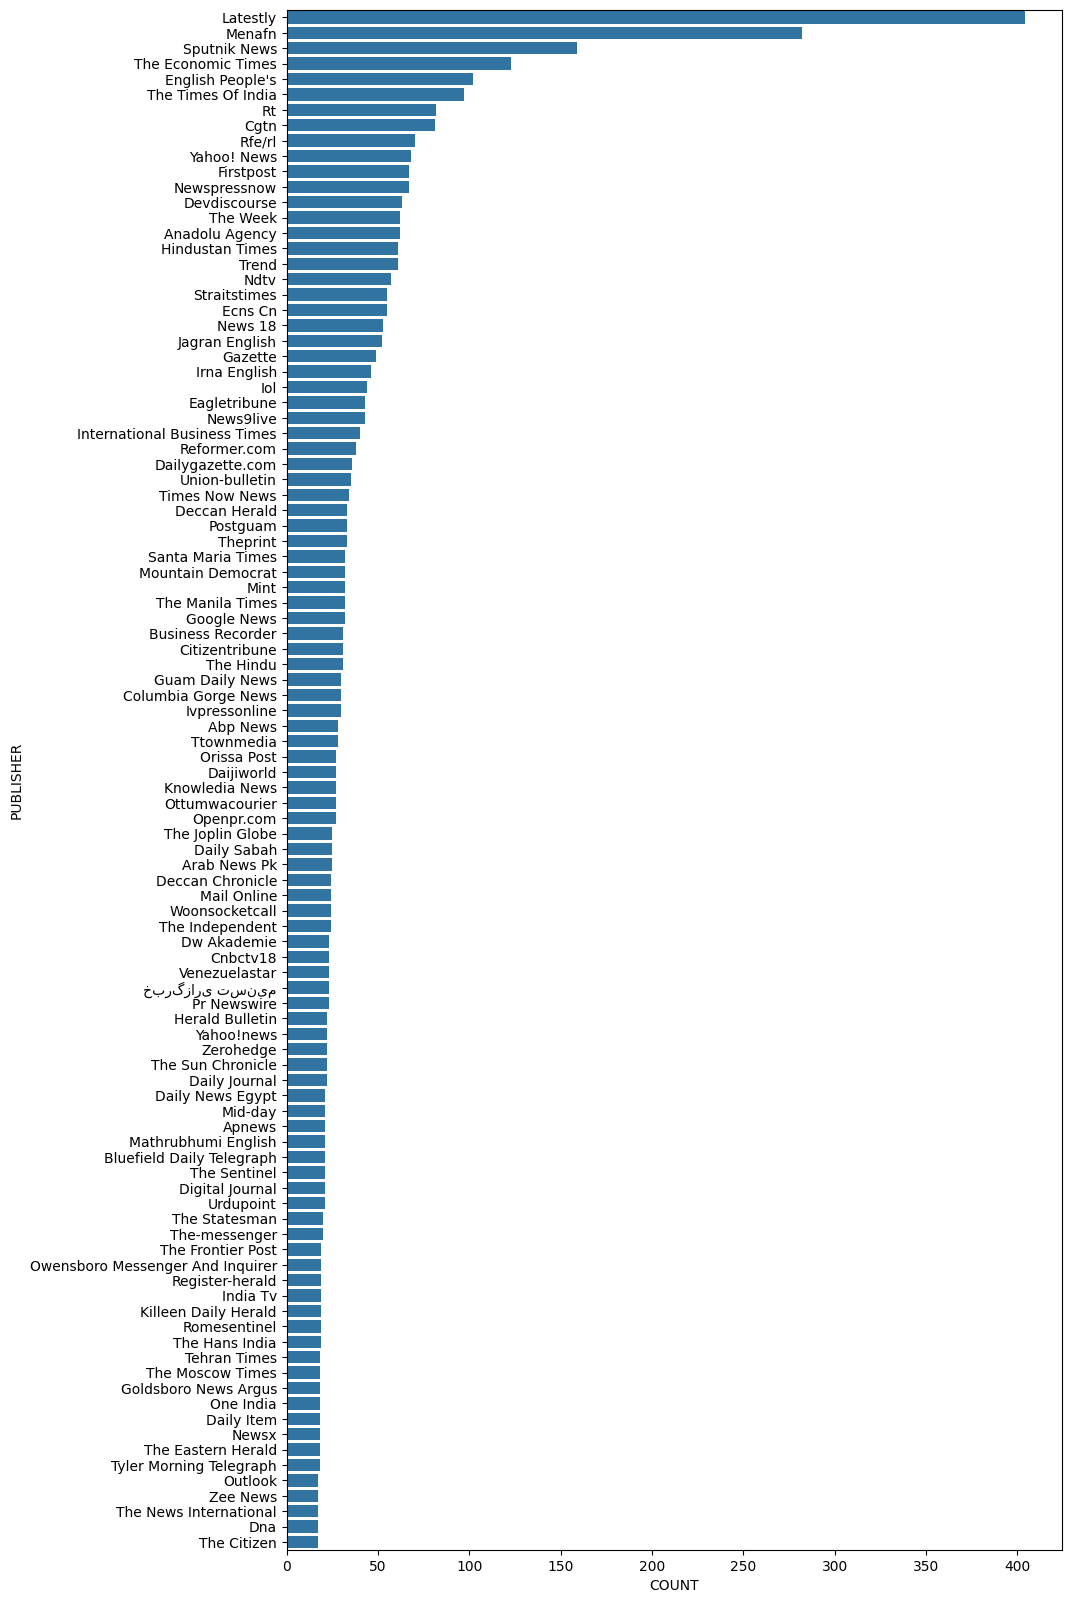

In [44]:
plot_top_n(df, "PUBLISHER", 100, (10,20), "")

In [48]:
WaPo = df[df["PUBLISHER"].str.startswith("The Washington Post", na=False)]
WaPo.head(10)

,TITLE,ARTICLE LINK,PUBLISHED DATE (GMT),AUTHOR,PUBLISHER,COUNTRY,CATEGORY,LANGUAGE,DESCRIPTION,IMAGE URL,VIDEO URL
1038,"""Shattered""",https://www.washingtonpost.com/opinions/2024/1...,2024-10-24 21:41:35,Michael Ramirez,The Washington Post,United States Of America,Politics,English,Michael Ramirez cartoon on the intergovernment...,NaN,NaN
1165,"""Putin presents himself as champion of the dev...",https://www.washingtonpost.com/world/2024/10/2...,2024-10-24 18:21:56,Francesca Ebel,The Washington Post,United States Of America,World,English,Russia was in the spotlight at the BRICS summi...,NaN,NaN
2870,"""Putin relishes role on stage, but Ukraine war...",https://www.washingtonpost.com/world/2024/10/2...,2024-10-23 18:09:48,Francesca Ebel,The Washington Post,United States Of America,World,English,The summit’s final document said little about ...,NaN,NaN
3902,"""Putin is hosting the BRICS summit in Russia. ...",https://www.washingtonpost.com/world/2024/10/2...,2024-10-23 10:51:22,Kelsey Ables,The Washington Post,United States Of America,World,English,Russian President Vladimir Putin is hosting le...,NaN,NaN
4454,"""The growing tension within the BRICS""",https://www.washingtonpost.com/world/2024/10/2...,2024-10-23 04:00:49,Ishaan Tharoor,The Washington Post,United States Of America,World,English,Russia and China see the burgeoning bloc as a ...,NaN,NaN
6722,"""BRICS is key to Putin’s fight against the U.S...",https://www.washingtonpost.com/world/2024/10/2...,2024-10-21 07:00:07,"Robyn Dixon, Katharine Houreld, Francesca Ebel...",The Washington Post,United States Of America,World,English,With Putin confident of a Russian victory in U...,NaN,NaN


In [30]:
df2.columns

Index(['title', 'author', 'published_date', 'published_date_precision', 'link',
       'clean_url', 'excerpt', 'summary', 'rights', 'rank', 'topic', 'country',
       'language', 'authors', 'media', 'is_opinion', 'twitter_account',
       '_score', '_id'],
      dtype='object')

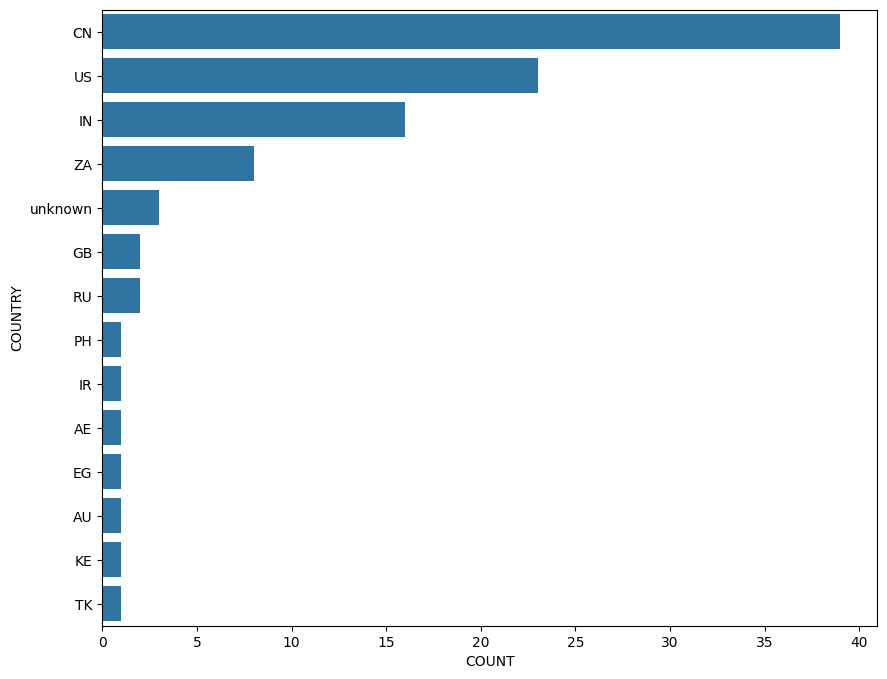

In [31]:
# Convert the value_counts result into a DataFrame
country_counts = df2["country"].value_counts().head(40).reset_index()
country_counts.columns = ["COUNTRY", "COUNT"]

# Set figure size to make it broader
plt.figure(figsize=(10, 8))  # Adjust the width (16) and height (6) as needed

# Plot the barplot
sns.barplot(data=country_counts, y="COUNTRY", x="COUNT")

# Rotate x-axis ticks by 60 degrees
plt.xticks(rotation=0)

# Show the plot
plt.show()

# LDA

In [9]:
def quick_lda(df, text_column, n_topics=5, n_articles=500, max_iter=100, random_state=42):
    """
    Quickly run LDA on a small subset of articles for fast feedback.

    Args:
    - df (pd.DataFrame): DataFrame containing the text data.
    - text_column (str): Column name with the article text.
    - n_topics (int): Number of topics to extract.
    - n_articles (int): Number of articles to sample.
    - max_iter (int): Maximum number of iterations for LDA.
    - random_state (int): Random seed for reproducibility.

    Returns:
    - lda_model: Trained LDA model.
    - topics: Topics with top words.
    - dominant_topics: DataFrame with dominant topic for each article.
    - corpus: Bag-of-words representation of the documents.
    - dictionary: Gensim Dictionary for the corpus.
    """
    # Subset the articles
    df_sample = df.sample(n=n_articles, random_state=random_state)

    # Preprocessing
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    processed_texts = df_sample[text_column].apply(lambda x: [
        lemmatizer.lemmatize(word.lower()) 
        for word in word_tokenize(x) 
        if word.isalnum() and word not in stop_words
    ])
    
    # Create dictionary and corpus
    dictionary = Dictionary(processed_texts)
    corpus = [dictionary.doc2bow(text) for text in processed_texts]

    # Train LDA model
    lda_model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=n_topics,
        iterations=max_iter,
        random_state=random_state
    )
    
    # Extract topics
    topics = {i: lda_model.show_topic(i, topn=10) for i in range(n_topics)}

    # Assign dominant topic to each article
    topic_assignments = [
        sorted(lda_model.get_document_topics(bow), key=lambda x: -x[1])[0][0]
        for bow in corpus
    ]
    df_sample['Dominant_Topic'] = topic_assignments

    return lda_model, topics, df_sample[['Dominant_Topic', text_column]], corpus, dictionary


In [6]:
df.columns

Index(['TITLE', 'ARTICLE LINK', 'PUBLISHED DATE (GMT)', 'AUTHOR', 'PUBLISHER',
       'COUNTRY', 'CATEGORY', 'LANGUAGE', 'DESCRIPTION', 'IMAGE URL',
       'VIDEO URL'],
      dtype='object')

In [10]:
import nltk
nltk.download('punkt_tab')

df_cleaned = df.dropna(subset=['DESCRIPTION'])


lda_model, topics, labeled_articles = quick_lda(df_cleaned, 'DESCRIPTION', n_topics=20, n_articles=5000)
print(topics)
print(labeled_articles.head())


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\onepl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


ValueError: too many values to unpack (expected 3)

In [ ]:
import pandas as pd

def interpret_lda_results(lda_model, corpus, dictionary, df, text_column, topn=10):
    """
    Interpret the results of an LDA model.
    
    Args:
    - lda_model: Trained Gensim LDA model.
    - corpus: Bag-of-words representation of the documents.
    - dictionary: Gensim Dictionary for the corpus.
    - df: Original DataFrame with articles.
    - text_column: Column name in df containing the articles.
    - topn: Number of top words to display for each topic.
    
    Returns:
    - topics_df: DataFrame with top words for each topic.
    - doc_topic_df: DataFrame with dominant topics for each document.
    - topic_distribution: Series summarizing the proportion of documents in each topic.
    """
    # Extract top words for each topic
    topics = {
        topic_id: [word for word, _ in lda_model.show_topic(topic_id, topn=topn)]
        for topic_id in range(lda_model.num_topics)
    }
    topics_df = pd.DataFrame.from_dict(topics, orient='index', columns=[f'Word {i+1}' for i in range(topn)])
    topics_df.index.name = 'Topic'

    # Assign dominant topic to each document
    doc_topic_data = []
    for i, row in enumerate(lda_model[corpus]):
        dominant_topic = sorted(row, key=lambda x: -x[1])[0]  # Get the topic with the highest weight
        doc_topic_data.append((i, dominant_topic[0], dominant_topic[1]))
    
    doc_topic_df = pd.DataFrame(doc_topic_data, columns=['Document', 'Dominant Topic', 'Dominant Topic Weight'])
    doc_topic_df['Text'] = df[text_column].iloc[doc_topic_df['Document']].values

    # Calculate topic distribution
    topic_distribution = doc_topic_df['Dominant Topic'].value_counts(normalize=True).sort_index()

    return topics_df, doc_topic_df, topic_distribution


In [11]:
# Run quick LDA
lda_model, topics, labeled_articles, corpus, dictionary = quick_lda(df_cleaned, 'DESCRIPTION', n_topics=20, n_articles=5000)

# Interpret the results
topics_df, doc_topic_df, topic_distribution = interpret_lda_results(
    lda_model, corpus, dictionary, df_cleaned, 'DESCRIPTION', topn=10
)

# View the outputs
print(topics_df)  # Top words for each topic
print(doc_topic_df.head())  # Dominant topics for documents
print(topic_distribution)  # Topic proportions


          Word 1       Word 2     Word 3       Word 4     Word 5      Word 6  \
Topic                                                                          
0          brics      country     summit       global      kazan         the   
1          brics       summit        the    president     russia      global   
2          brics       global  president      country     russia       putin   
3          brics       summit      kazan        putin         un        gaza   
4           iraq      defense     target          air     turkey    ministry   
5         russia    president    russian     minister      prime       first   
6        russian        china       iran        india      brics      leader   
7          brics        world     summit      western     russia      leader   
8          brics  cooperation    country  development     market         the   
9      president        brics     russia          the    housing      summit   
10        attack      turkish       said